In [1]:
import json
import sys
import cv2
import numpy as np
import math
import os, sys, shutil
import argparse
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os, sys, shutil

In [2]:
class Point(object):
    def __init__(self, x, y, c):
        self.x = x     # x_coordinate of the point
        self.y = y     # y_coordinate of the point
        self.c = c     # confidence of the point

    def __repr__(self):
        return 'x: '+ str(self.x) + ", y: " +str(self.y) + ", c: " + str(self.c)

In [3]:
json_dir = '../../data/Titanik/json_keypoints/video001_keypoints/'
list_of_items = os.listdir(json_dir)

In [4]:
json_arr = []

for i in range(len(list_of_items)):
    json_file = str(i) + '.json'
    
    with open(json_dir + json_file) as file:
        json_data = json.loads(file.read())
        json_arr.append(json_data)

In [5]:
result_arr = []
label_arr = []


In [6]:
for json in range(0, len(json_arr)):
    person = json_arr[json]['people'][0]
    pose = person['pose_keypoints_2d']
    face = person['face_keypoints_2d']
    left_hand = person['hand_left_keypoints_2d']
    right_hand = person['hand_right_keypoints_2d']

    ########## EXTRACT POSE POINTS  ##########
    i = 0
    pose_points = []
    for i in range(0, len(pose), 3):
        temp = Point(pose[i],pose[i+1],pose[i+2])
        pose_points.append(temp)    # add this point to pose point array
        
    ########## EXTRACT FACE POINTS  ##########
    i = 0
    face_points = []
    for i in range(0, len(face), 3):
        temp = Point(face[i],face[i+1],face[i+2])
        face_points.append(temp)    # add this point to pose point array
        i+=3

    ########## EXTRACT LEFT HAND POINTS  ##########
    i = 0
    lhand_points = []
    for i in range(0, len(left_hand), 3):
        temp = Point(left_hand[i],left_hand[i+1],left_hand[i+2])
        lhand_points.append(temp)    # add this point to pose point array
        i+=3


    ########## EXTRACT RIGHT HAND POINTS  ##########
    i = 0
    rhand_points = []
    for i in range(0, len(right_hand), 3):
        temp = Point(right_hand[i],right_hand[i+1],right_hand[i+2])
        rhand_points.append(temp)    # add this point to pose point array
        i+=3
    
    # neck: 1, nose: 0,
    # left: 4, right: 7
    
    # CALCULATE LEFT DISTANCE
    left_to_neck = math.sqrt((math.pow(pose_points[4].x-pose_points[1].x,2)+math.pow(pose_points[4].y-pose_points[1].y,2)))
    left_to_nose = math.sqrt((math.pow(pose_points[4].x-pose_points[0].x,2)+math.pow(pose_points[4].y-pose_points[0].y,2)))
    
    threshold = 0.1
    if pose_points[4].c < threshold:
        left_to_neck = 0
        left_to_nose = 0
    
    # CALCULATE RIGHT DISTANCE
    right_to_neck = math.sqrt((math.pow(pose_points[7].x-pose_points[1].x,2)+math.pow(pose_points[7].y-pose_points[1].y,2)))
    right_to_nose = math.sqrt((math.pow(pose_points[7].x-pose_points[0].x,2)+math.pow(pose_points[7].y-pose_points[0].y,2)))
    if pose_points[4].c < threshold:
        right_to_neck = 0
        right_to_nose = 0
    
    # CALCULATE LEFT FINGERS
    l_thumb = math.sqrt((math.pow(lhand_points[4].x-rhand_points[0].x,2)+math.pow(lhand_points[4].y-rhand_points[0].y,2)))
    l_index = math.sqrt((math.pow(lhand_points[8].x-rhand_points[0].x,2)+math.pow(lhand_points[8].y-rhand_points[0].y,2)))
    l_middle = math.sqrt((math.pow(lhand_points[12].x-rhand_points[0].x,2)+math.pow(lhand_points[12].y-rhand_points[0].y,2)))
    l_ring = math.sqrt((math.pow(lhand_points[16].x-rhand_points[0].x,2)+math.pow(lhand_points[16].y-rhand_points[0].y,2)))
    l_pinky = math.sqrt((math.pow(lhand_points[20].x-rhand_points[0].x,2)+math.pow(lhand_points[20].y-rhand_points[0].y,2)))
    
    if lhand_points[4].c < threshold:
        l_thumb = 0

    if lhand_points[8].c < threshold:
        l_index = 0

    if lhand_points[12].c < threshold:
        l_middle = 0
        
    if lhand_points[16].c < threshold:
        l_ring = 0
        
    if lhand_points[20].c < threshold:
        l_pinky = 0
        
    
    # CALCULATE RIGHT FINGERS
    r_thumb = math.sqrt((math.pow(rhand_points[4].x-rhand_points[0].x,2)+math.pow(rhand_points[4].y-rhand_points[0].y,2)))
    r_index = math.sqrt((math.pow(rhand_points[8].x-rhand_points[0].x,2)+math.pow(rhand_points[8].y-rhand_points[0].y,2)))
    r_middle = math.sqrt((math.pow(rhand_points[12].x-rhand_points[0].x,2)+math.pow(rhand_points[12].y-rhand_points[0].y,2)))
    r_ring = math.sqrt((math.pow(rhand_points[16].x-rhand_points[0].x,2)+math.pow(rhand_points[16].y-rhand_points[0].y,2)))
    r_pinky = math.sqrt((math.pow(rhand_points[20].x-rhand_points[0].x,2)+math.pow(rhand_points[20].y-rhand_points[0].y,2)))
            
    if rhand_points[4].c < threshold:
        r_thumb = 0
        
    if rhand_points[8].c < threshold:
        r_index = 0
        
    if rhand_points[12].c < threshold:
        r_middle = 0
        
    if rhand_points[16].c < threshold:
        r_ring = 0
        
    if rhand_points[20].c < threshold:
        r_pinky = 0
            
    #temp_arr = [left_to_neck, left_to_nose, right_to_neck, right_to_nose, l_thumb, l_index, l_middle, l_ring, l_pinky,
     #          r_thumb, r_index, r_middle, r_ring, r_pinky]
        
    temp_arr = [left_to_neck, left_to_nose, right_to_neck, right_to_nose]
    
    result_arr.append(temp_arr)
    label_arr.append(json)
    

In [7]:
for feature in range(len(result_arr[0])):
    for index in range(len(result_arr)):
        value = result_arr[index][feature]

        if value == 0:
            for next_index in range(index + 1, len(result_arr)):
                next_value = result_arr[next_index][feature]

                if(next_value != 0):
                    linear_down_val = result_arr[index - 1][feature]
                    linear_up_val = result_arr[next_index][feature]

                    linear_index_diff = next_index - (index - 1)
                    linear_val_diff_per_index = (linear_up_val - linear_down_val) / linear_index_diff

                    for fix_index in range(index, next_index):
                        linear_down_val += linear_val_diff_per_index
                        result_arr[fix_index][feature] = linear_down_val

                    break
    

In [8]:
points_error = []
for feature in range(len(result_arr[0])):
    for index in range(len(result_arr)):
        if result_arr[index][feature] == 0:
            points_error.append(index)
            break
            
    print(str(feature) + " is done.")

0 is done.
1 is done.
2 is done.
3 is done.


In [9]:
result_arr = np.asarray(result_arr)
label_arr = np.asarray(label_arr)

if(len(points_error) != 0):
    slice_point = min(points_error)

    label_arr = label_arr[0:slice_point]
    result_arr = result_arr[0:slice_point, :]

    print(result_arr.shape)

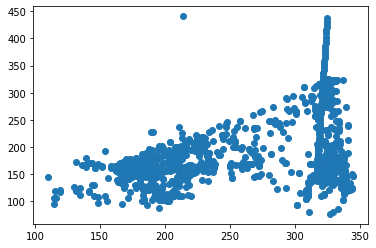

In [10]:
x_axis = result_arr[:,1]  # left distance
y_axis = result_arr[:,3]  # right distance

# Plotting
plt.scatter(x_axis, y_axis)
plt.show()

In [11]:
max_value = max([max(result_arr[i]) for i in range(len(result_arr))])
result_arr = result_arr / max_value

In [12]:
num_of_cluster = 10

model = KMeans(n_clusters=num_of_cluster)
model.fit(result_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
all_predictions = model.predict(result_arr)

In [14]:
for i in range(num_of_cluster):
    path_name = "./" + str(i)
    if not os.path.exists(path_name):
        os.mkdir(path_name)
    
for i in range(len(all_predictions)):
    shutil.copy("../../data/Titanik/frames/video001_frames_openpose/frame"+str(label_arr[i])+".jpg", "./"+str(all_predictions[i]), follow_symlinks=True)

In [16]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

ModuleNotFoundError: No module named 'fastdtw'